# Similarity Based Learning: the k-Nearest Neighbor (kNN) Classifier

#### Organized and prepared by: Christopher Monterola

### This notebook is mainly based on the following:

Introduction to Machine Learning with Python, A. Mueller and S. Guido, O'Reilly 2017 
(see https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413 and https://github.com/amueller/introduction_to_ml_with_python/find/master) 

and the github repository at
https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# General Idea 

The kNN classifier is a *non-parametric* and *instance-based* learning algorithm.

*Non-parametric* means it makes no explicit assumptions about the functional form of the mapping, avoiding the dangers of mismodeling the underlying distribution of the data. For example, suppose our data is highly non-Gaussian but the learning model we choose assumes a Gaussian form. In that case, our algorithm would make extremely poor predictions.

*Instance-based* learning means that our algorithm doesn’t explicitly learn a model. Instead, it chooses to memorize the training instances which are subsequently used as “knowledge” for the prediction phase. Concretely, this means that only when a query to our database is made (i.e. when we ask it to predict a label given an input), will the algorithm use the training instances to spit out an answer.


Consider a training set with $N$ samples given by {$X_1, X_2, \ldots, X_N$} with the corresponding targets {$y_1, y_2, \ldots, y_N$}, where each of the ${X_i}$ data set contains $M$ features, for example:
 
 for i = 1: {X_1} ={$x_1^a, x_1^b, \ldots, x_1^M$} with target $y_1$
 
 for i = 2: {X_2} ={$x_2^a, x_2^b, \ldots, x_2^M$} with target $y_2$
 
 up to 
 
 for i = N: {X_N} ={$x_N^a, x_N^b, \ldots, x_N^M$} with target $y_N$
 
 then the  target of a given feature {$q^a, q^b, \dots, q^M$} is the $y_N$ that gives the smallest euclidean distance $d_N$
 
 \begin{equation}
 d_N= \sqrt{(x_N^a-q^a)^2 + (x_N^b-q^b)^2 + \ldots + (x_N^M-q^M)^2}
 \end{equation}
 
 We can generalize the above by considering $k$ neighbors such that the  target of a given feature {$q^a, q^b, \dots, q^M$} is:
 
 1) the mode of the state ${y_N}$ based on the k-th nearest neighbor (collection of $k$ smallest euclidean distances $d_N$).
 
 2) in case of a tied number of states, the state with the highest population in  the training set is prioritized.
 

In general, the distance is computed using Minkowski distance given by:

 \begin{equation}
 d_N= \left(\left|(x_N^a-q^a)^p + (x_N^b-q^b)^p + \ldots + (x_N^M-q^M)^p \right| \right)^{1/p}
 \end{equation}
 
 where $d_N$ is known as Manhattan for $p=1$, Euclidean for $p=2$ and is normally the default, and Chebyshev distance for $p \rightarrow \infty$.

To visually illustrate kNN let's use an example of a synthetic two-class classification dataset, the forge dataset, which has two features. Below is a scatter plot visualizing all of the data points in this dataset.
The plot has the first feature on the x-axis and the second feature on the y-axis.

As is always the case in in scatter plots, each data point is represented as one dot. The
color of the dot indicates its class, with red meaning class 0 and blue meaning class 1.


Here is the data set that is available in the $mglearn$ library, you have the list of two features each for sample $i$ given by {$X_i$}={$x_i^a, x_i^b$} and the list of the corresponding $y_i$

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()

print("Data Set:{}".format(mglearn.datasets.make_forge()))

Data Set:(array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]]), array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
     

In [3]:
print("The element of the first feature is given by: {}".format(X[:, 0]))
print("The element of the second feature is given by: {}".format(X[:, 1]))
print("The element of the target feature is given by: {}".format(y))

The element of the first feature is given by: [ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863
 11.93027136  9.67284681  8.34810316  8.67494727  9.17748385 10.24028948
  8.68937095  8.92229526  9.49123469  9.25694192  7.99815287  8.18378052
  8.7337095   9.32298256 10.06393839  9.50048972  8.34468785  9.50169345
  9.15072323 11.563957  ]
The element of the second feature is given by: [ 4.59676542 -0.16816717  5.21116083  1.54322016  4.28695977  4.80623966
  4.64866327 -0.20283165  5.13415623  4.47573059  5.09283177  2.45544401
  1.48709629 -0.63993225  4.33224792  5.13284858  4.8525051   1.29564214
  2.49162431  5.09840649  0.99078055 -0.26430318  1.63824349  1.93824624
  5.49832246  1.3389402 ]
The element of the target feature is given by: [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


In [4]:
import pandas as pd
df = pd.DataFrame({'First Feature':X[:, 0], 'Second Feature':X[:,1],'Target':y} )
df

,First Feature,Second Feature,Target
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0
5,8.309889,4.806240,1
6,11.930271,4.648663,1
7,9.672847,-0.202832,0
8,8.348103,5.134156,1
9,8.674947,4.475731,1


X.shape: (26, 2)


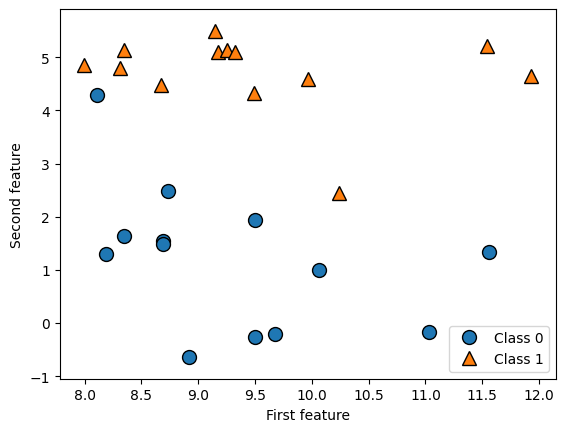

In [5]:
# plot dataset 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

As you can see from X.shape, this dataset consists of 26 data points, with 2 features. The k-Nearest Neighbors (kNN) algorithm is arguably the simplest machine learning algorithm. Building the model only consists of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset, it “nearest neighbors”.

In its simplest version, the algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.

The prediction is then simply the known output for this training point. Figure forge_one_neighbor illustrates this for the case of classification on the forge dataset.


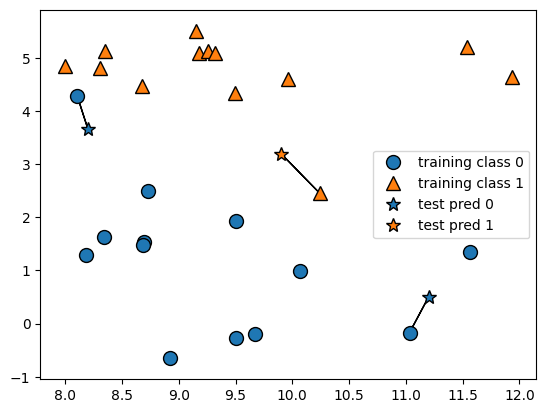

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as crosses. For each of them, we marked the closest point in the training set. The prediction of the one-nearestneighbor algorithm is the label of that point (shown by the color of the star).

Instead of considering only the closest neighbor, we can also consider an arbitrary number $k$ of neighbors. This is where the name of the $k$ neighbors algorithm comes from. When considering more than one neighbor, we use voting to assign a label. 

This means, for each test point, we count how many neighbors are red, and how many neighbors are blue. We then assign the class that is more frequent: in other words, the majority class among the k neighbors.

Below is an illustration using the three closest neighbors. Again, the prediction is shown as the color of the cross. You can see that the prediction changed for the point in the top left from using only one neighbor.

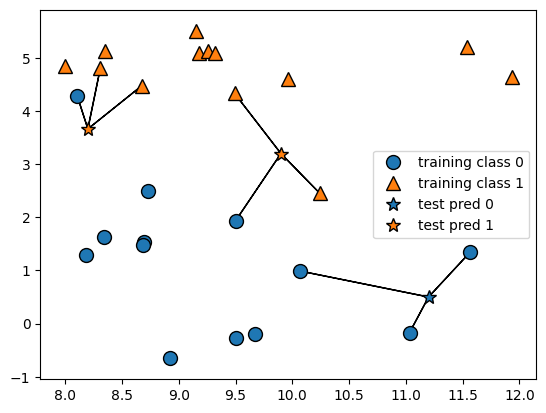

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

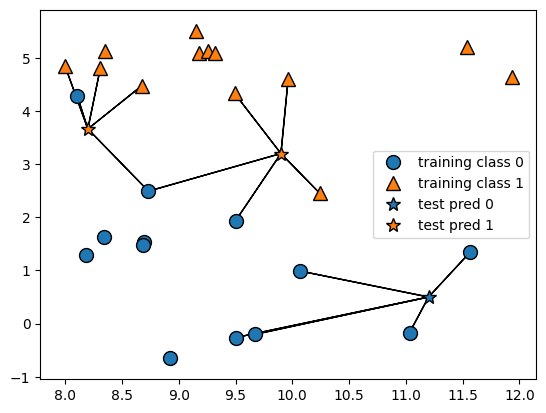

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

While this illustration is for a binary classification problem, you can imagine this
working with any number of classes. For more classes, we count how many neighbors
belong to each class, and again predict the most common class.
Now let’s look at how we can apply the $k$ nearest neighbors algorithm using scikitlearn.
First, we split our data into a training and a test set, so we can evaluate generalization
performance, default is 75:25.

In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)


Next we import and instantiate the class. This is when we can set parameters, like the
number of neighbors to use. Here, we set it to three.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set. For KNeighborsClassifier this
means storing the dataset, so we can compute neighbors during prediction.

In [11]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To make predictions on the test data, we call the predict method. This computes the
nearest neighbors in the training set and finds the most common class among these:

In [12]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:

In [13]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


We see that our model is about 86% accurate, meaning the model predicted the class
correctly for 86% of the samples in the test dataset.

### Analyzing kNN Classifier

For two-dimensional datasets, we can also illustrate the prediction for all possible test point in the xy-plane. We color the plane red in regions where points would be assigned the red class, and blue otherwise. This lets us view the decision boundary, which is the divide between where the algorithm assigns class red versus where it
assigns class blue.

Here is a visualization of the decision boundary for one, three and five neighbors:

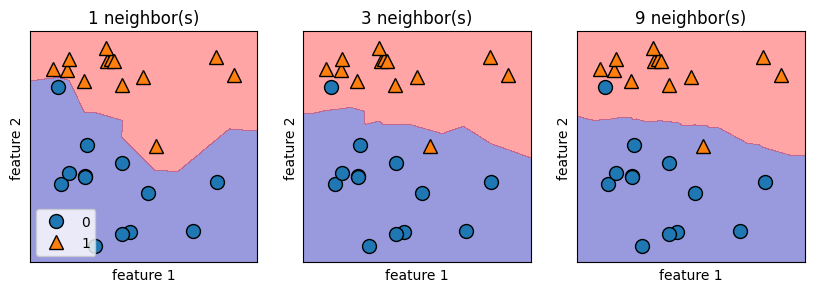

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 1")
    ax.set_ylabel("feature 2")
axes[0].legend(loc=3)

As you can see in the left figure, using a single neighbor results in a decision boundary
that follows the training data closely. Considering more and more neighbors leads
to a smoother decision boundary. A smoother boundary corresponds to a simple
model. 

In other words, using few neighbors corresponds to high model complexity
(as shown on the right side of Figure model_complexity), and using many neighbors
corresponds to low model complexity.


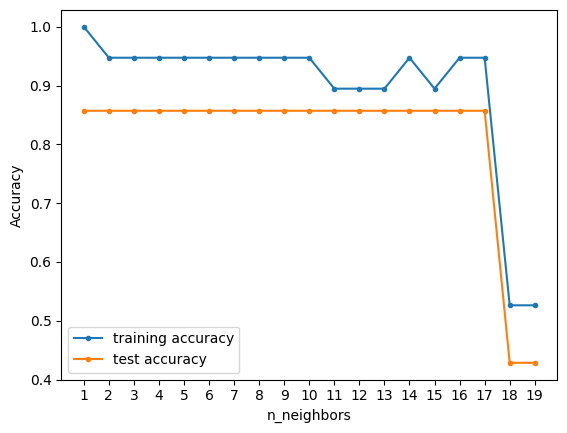

In [15]:
X, y = mglearn.datasets.make_forge()

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)


training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy",  marker = '.')
plt.plot(neighbors_settings, test_accuracy, label="test accuracy", marker = '.')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.xticks(list(np.arange(1,20)))
plt.legend()

## Example 1. Classifying Iris species

Let’s assume that a hobby botanist is interested in distinguishing what the species is of
some iris flowers that she found. She has collected some measurements associated
with the iris: the length and width of the petals, and the length and width of the sepal,
all measured in centimeters.

She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species Setosa, Versicolor or Virginica. For
these measurements, she can be certain of which species each iris belongs to. Let’s
assume that these are the only species our hobby botanist will encounter in the wild.
Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

<img src="flower.jpg">

Since we have measurements for which we know the correct species of iris, this is a
supervised learning problem. In this problem, we want to predict one of several
options (the species of iris). This is an example of a classification problem. The possible
outputs (different species of irises) are called classes.
Since every iris in the dataset belongs to one of three classes this problem is a threeclass
classification problem.

The desired output for a single data point (an iris) is the species of this flower. For a
particular data point, the species it belongs to is called its label.

**Meet the data**

The data we will use for this example is the iris dataset, a classical dataset in machine
learning an statistics.
It is included in scikit-learn in the dataset module. We can load it by calling the
load_iris function:

In [16]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

The iris object that is returned by load_iris is a Bunch object, which is very similar
to a dictionary. It contains keys and values:

In [17]:
print("keys of iris_dataset: \n{}".format(iris_dataset.keys()))

keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


The value to the key DESCR is a short description of the dataset. We show the beginning
of the description here. Feel free to look up the rest yourself.

In [18]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 
...


The value with key target_names is an array of strings, containing the species of
flower that we want to predict:

In [19]:
print("Target Names:{}".format(iris_dataset['target_names']))

Target Names:['setosa' 'versicolor' 'virginica']


The feature_names are a list of strings, giving the description of each feature:

In [20]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The data itself is contained in the target and data fields. The data contains the
numeric measurements of sepal length, sepal width, petal length, and petal width in a
numpy array:


In [21]:
print("Type of data: {}".format(type(iris_dataset['data'])))
    

Type of data: <class 'numpy.ndarray'>


The rows in the data array correspond to flowers, while the columns represent the
four measurements that were taken for each flower:


In [22]:
print("Shape of data:{}".format(iris_dataset['data'].shape))


Shape of data:(150, 4)


We see that the data contains measurements for 150 different flowers.
Remember that the individual items are called **samples** in machine learning, and their
properties are called **features**.

The **shape** of the data array is the number of samples times the number of features.

This is a convention in scikit-learn, and your data will always be assumed to be in this
shape.

Here are the feature values for the first five samples:


In [23]:
print("First five rows of data: \n{}".format(iris_dataset['data'][:5]))

First five rows of data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


From this data, we can see that all of the first five flowers have a petal width of 0.2 cm and that the first flower has the longest sepal, at 5.1 cm. The target array contains the species of each of the flowers that were measured, also as a numpy array:

In [24]:
type(iris_dataset['target'])

numpy.ndarray

The target is a one-dimensional array, with one entry per flower:

In [25]:
iris_dataset['target'].shape

(150,)

The species are encoded as integers from 0 to 2:

In [26]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The meaning of the numbers are given by the iris['target_names'] array: 0 means
Setosa, 1 means Versicolor and 2 means Virginica.

## Measuring Success: Training and testing data

We want to build a machine learning model from this data that can predict the species
of iris for a new set of measurements. Before we can apply our model to new measurements, we need to know whether ourmodel actually works, that is whether we should trust its predictions.

Unfortunately, we can not use the data we use to build the model to evaluate it. This is
because our model can always simply remember the whole training set, and will
therefore always predict the correct label for any point in the training set. This
“remembering” does not indicate to us whether our model will generalize well, in
other words whether it will also perform well on new data. So before we apply our
model to new measurements, we will want to know whether we can trust its predictions.
To assess the models’ performance, we show the model new data (that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data we
have collected (here our 150 flower measurements) into two parts.
The part of the data is used to build our machine learning model, and is called the
training data or training set. The rest of the data will be used to access how well the
model works and is called test data, test set or hold-out set.
Scikit-learn contains a function that shuffles the dataset and splits it for you, the
train_test_split function.

This function extracts 75% of the rows in the data as the training set, together with
the corresponding labels for this data. The remaining 25% of the data, together with
the remaining labels are declared as the test set.
How much data you want to put into the training and the test set respectively is
somewhat arbitrary, but using a test-set containing 25% of the data is a good rule of
thumb.
In scikit-learn, data is usually denoted with a capital X, while labels are denoted by a
lower-case y.
Let’s call train_test_split on our data and assign the outputs using this nomenclature:

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],
random_state=0)

The train_test_split function shuffles the dataset using a pseudo random number
generator before making the split. If we would take the last 25% of the data as a test
set, all the data point would have the label 2, as the data points are sorted by the label
(see the output for iris['target'] above). Using a tests set containing only one of
the three classes would not tell us much about how well we generalize, so we shuffle
our data, to make sure the test data contains data from all classes.

To make sure that we will get the same output if we run the same function several
times, we provide the pseudo random number generator with a fixed seed using the
random_state parameter. This will make the outcome deterministic, so this line will
always have the same outcome. We will always fix the random_state in this way when
using randomized procedures in this book.

The output of the train_test_split function are X_train, X_test, y_train and
y_test, which are all numpy arrays. X_train contains 75% of the rows of the dataset,
and X_test contains the remaining 25%:

In [28]:
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
Y_train shape: (112,)


In [29]:
print("X_train shape: {}".format(X_test.shape))
print("Y_train shape: {}".format(y_test.shape))

X_train shape: (38, 4)
Y_train shape: (38,)


## First things first: Look at your data

Before building a machine learning model, it is often a good idea to inspect the data,
to see if the task is easily solvable without machine learning, or if the desired information
might not be contained in the data.

Additionally, inspecting your data is a good way to find abnormalities and peculiarities.
Maybe some of your irises were measured using inches and not centimeters, for
example. In the real world, inconsistencies in the data and unexpected measurements
are very common.

One of the best ways to inspect data is to visualize it. One way to do this is by using a
scatter plot. A scatter plot of the data puts one feature along the x-axis, one feature along the yaxis,
and draws a dot for each data point.
Unfortunately, computer screens have only two dimensions, which allows us to only
plot two (or maybe three) features at a time. It is difficult to plot datasets with more
than three features this way.
One way around this problem is to do a pair plot, which looks at all pairs of two features.
If you have a small number of features, such as the four we have here, this is
quite reasonable. You should keep in mind that a pair plot does not show the interaction
of all of features at once, so some interesting aspects of the data may not be
revealed when visualizing it this way.
Here is a pair plot of the features in the training set. The data points are colored
according to the species the iris belongs to.

To create the plot we first convert the NumPy array into a pandas DataFrame. pandas has a function to create pair plots called scatter_matrix. The diagonal of this matrix is filled with histograms of each feature!

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the iris dataset
iris = sns.load_dataset("iris")

# Create a pairplot
g = sns.pairplot(iris, hue="species", diag_kind="kde")

# Ensure the legend is visible
plt.legend(title="Species")

# Show the plot
plt.show()

ModuleNotFoundError: No module named 'seaborn'

Building this model only consists of storing the training set. To make a prediction for
a new data point, the algorithm finds the point in the training set that is closest to the
new point. Then, it and assigns the label of this closest data training point to the new
data point.
The k in k nearest neighbors stands for the fact that instead of using only the closest
neighbor to the new data point, we can consider any fixed number k of neighbors in
the training (for example, the closest three or five neighbors). Then, we can make a
prediction using the majority class among these neighbors. We will go into more
details about this later.
Let’s use only a single neighbor for now.
All machine learning models in scikit-learn are implemented in their own class,
which are called Estimator classes. The k nearest neighbors classification algorithm
is implemented in the KNeighborsClassifier class in the neighbors module.
Before we can use the model, we need to instantiate the class into an object. This is
when we will set any parameters of the model. The single parameter of the KNeighbor
sClassifier is the number of neighbors, which we will set to one:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

The knn object encapsulates the algorithm to build the model from the training data,
as well the algorithm to make predictions on new data points.
It will also hold the information the algorithm has extracted from the training data.
In the case of KNeighborsClassifier, it will just store the training set.
To build the model on the training set, we call the fit method of the knn object,
which takes as arguments the numpy array X_train containing the training data and
the numpy array y_train of the corresponding training labels:

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## Making predictions
We can now make predictions using this model on new data, for which we might not
know the correct labels.

Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of
2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would
this be?

We can put this data into a numpy array, again with the shape number of samples
(one) times number of features (four):


In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

To make prediction we call the predict method of the knn object:

In [ ]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
       iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


Our model predicts that this new iris belongs to the class 0, meaning its species is
Setosa.
But how do we know whether we can trust our model? We don’t know the correct
species of this sample, which is the the whole point of building the model!

## Evaluating the model

This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species are for each iris in the test
set.
We can make a prediction for an iris in the test data, and compare it against its label
(the known species). We can measure how well the model works by computing the
accuracy, which is the fraction of flowers for which the right species was predicted:

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


We can also use the score method of the knn object, which will compute the test set
accuracy for us:

In [ ]:

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. Under some mathematical assumptions,
this means that we can expect our model to be correct 97% of the time for new
irises.
For our hobby botanist application, this high level of accuracy means that our models
may be trustworthy enough to use. In later chapters we will discuss how we can
improve performance, and what caveats there are in tuning a model.

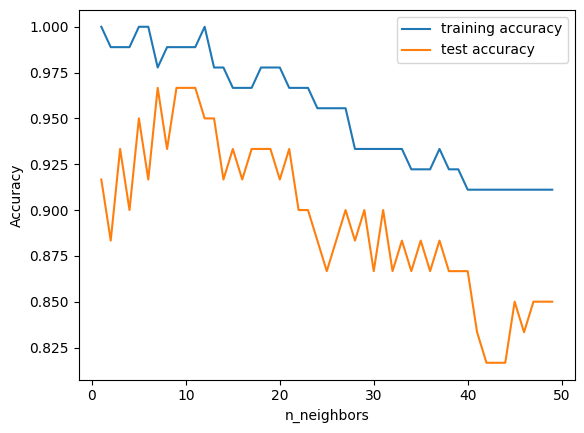

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.40,
random_state=0)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


## Summary
Let’s summarize what we learned in this example. We started off formulating a task of
predicting which species of iris a particular flower belongs to by using physical measurements
of the flower. We used a dataset of measurements that was annotated by an
expert with the correct species to build our model, making this a supervised learning
task. There were three possible species, Setosa, Versicolor or Virginica, which made
the task a three-class classification problem. The possible species are called classes in
the classification problem, and the species of a single iris is called its label.
The dataset consists of two numpy arrays, one containing the data, which is referred
to as X in scikit-learn, and one containing the correct or desired outputs, which is
called y. The array X is a two-dimensional array of features, with one row per data
point, and one column per feature. The array y is a one-dimensional array, which
here contained one class label from 0 to 2 for each of the samples.
We split our dataset into a training set, to build our model, and a test set, to evaluate
how well our model will generalize to new, unseen data.

We chose the k nearest neighbors classification algorithm, which makes predictions
for a new data point by considering its closest neighbor(s) in the training set.
The algorithm is implemented in the KNeighborsClassifier class, which contains
the algorithm to build the model, as well as the algorithm to make a prediction using
the model. We instantiated the class, setting parameters. Then, we built the model by
calling the fit method, passing the training data X_train and training outputs
y_train as parameters.

We evaluated the model using the score method, that computes the accuracy of the
model. We applied the score method to the test set data and the test set labels, and
found that our model is about 97% accurate, meaning it is correct 97% of the time on
the test set.

This gave us the confidence to apply the model to new data (in our example, new
flower measurements), and trust that the model will be correct about 97% of the time.

Here is a summary of the code needed for the whole training and evaluation procedure:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

NameError: name 'train_test_split' is not defined

This snippet contains the core code for applying any machine learning algorithms
using scikit-learn. The fit, predict and score methods are the common interface to
supervised models in scikit-learn, and with the concepts introduced in this chapter,
you can apply these models to many machine learning tasks.
In the next chapter, we will go into more depth about the different kinds of supervised
models in scikit-learn, and how to apply them successfully.